In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow
print(tensorflow.__version__)

2.2.0-rc3


In [0]:
from google.colab import drive
drive.mount('/content/gdrive/')
root_path = 'gdrive/My Drive/Colab Notebooks/'  #change dir to your project folder
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

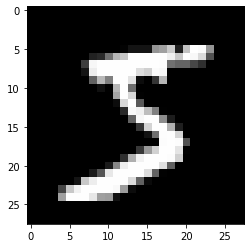

In [0]:
mnist = tf.keras.datasets.mnist  #loading up the data and sanity check
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap="Greys_r")

data = MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)
train_steps = 1000
learning_rate = 0.1 #gradient decent

W = tf.Variable(np.zeros([784, 10]).astype(np.float32))
b = tf.Variable(np.zeros(10, dtype=np.float32))

In [0]:
num_nodes = 350
weights_hidden = tf.Variable(tf.random.normal([784, num_nodes]), -0.1, 0.1) #2d matrix
bias_hidden = tf.Variable(tf.random.normal([num_nodes]), -0.1, 0.1) #1d matrix

# output layer
weights_output = tf.Variable(tf.random.normal([num_nodes, 10]), -0.1, 0.1) 
bias_output = tf.Variable(tf.random.normal([10]), -0.1, 0.1) #num of class (0 to 9), multiclass problem

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        preactivations_hidden = tf.add(tf.matmul(img_batch, weights_hidden), bias_hidden)
        activations_hidden = tf.nn.sigmoid(preactivations_hidden)

        logits = tf.add(tf.matmul(activations_hidden, weights_output), bias_output) #score, calculates every class probability and takes the higher one
      
        #logits = tf.matmul(img_batch, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch)) #loss functions
        
    grads = tape.gradient(xent, [weights_output, bias_output]) #gradient of loss function
    weights_output.assign_sub(learning_rate * grads[0])
    bias_output.assign_sub(learning_rate * grads[1])

    if not step % 100: #prediction accuracy
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))

Loss: 18.378395080566406 Accuracy: 0.125
Loss: 4.01601505279541 Accuracy: 0.3984375
Loss: 3.5232582092285156 Accuracy: 0.4921875
Loss: 2.3058602809906006 Accuracy: 0.5859375
Starting new epoch...
Loss: 1.8542438745498657 Accuracy: 0.625
Loss: 1.9639707803726196 Accuracy: 0.703125
Loss: 2.397315263748169 Accuracy: 0.6640625
Loss: 1.5504930019378662 Accuracy: 0.734375
Loss: 1.6931604146957397 Accuracy: 0.7109375
Starting new epoch...
Loss: 1.5862253904342651 Accuracy: 0.703125


In [0]:
test_preds = tf.argmax(tf.matmul(data.test_data, W) + b, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.098, shape=(), dtype=float32)


In [0]:
num_nodes = 350
weights_hidden = tf.Variable(tf.random.normal([784, num_nodes]), -0.1, 0.1)
bias_hidden = tf.Variable(tf.random.normal([num_nodes]), -0.1, 0.1)

# output layer
weights_output = tf.Variable(tf.random.normal([num_nodes, 10]), -0.1, 0.1)
bias_output = tf.Variable(tf.random.normal([10]), -0.1, 0.1) 

for step in range(train_steps):
    img_batch, lbl_batch = data.next_batch()
    with tf.GradientTape() as tape:
        preactivations_hidden = tf.add(tf.matmul(img_batch, weights_hidden), bias_hidden)
        activations_hidden = tf.nn.relu(preactivations_hidden)

        logits = tf.add(tf.matmul(activations_hidden, weights_output), bias_output)
        output = tf.nn.softmax(logits)
        #logits = tf.matmul(img_batch, W) + b
        xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
            logits=logits, labels=lbl_batch))
        
    grads = tape.gradient(xent, [weights_hidden, bias_hidden, weights_output, bias_output])
    weights_hidden.assign_sub(learning_rate * grads[0])
    bias_hidden.assign_sub(learning_rate * grads[1])
    weights_output.assign_sub(learning_rate * grads[2])
    bias_output.assign_sub(learning_rate * grads[3])

    if not step % 100:
        preds = tf.argmax(logits, axis=1, output_type=tf.int32)
        acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                             tf.float32))
        print("Loss: {} Accuracy: {}".format(xent, acc))
        

Loss: 164.54104614257812 Accuracy: 0.125
Loss: 9.968786239624023 Accuracy: 0.8125
Loss: 6.8481764793396 Accuracy: 0.8671875
Loss: 6.237473011016846 Accuracy: 0.875
Loss: 2.330810308456421 Accuracy: 0.921875
Starting new epoch...
Loss: 2.5602691173553467 Accuracy: 0.9296875
Loss: 2.2048606872558594 Accuracy: 0.9375
Loss: 2.0713768005371094 Accuracy: 0.9296875
Loss: 2.1894521713256836 Accuracy: 0.9375
Starting new epoch...
Loss: 1.5055122375488281 Accuracy: 0.8984375


In [0]:
test_preds = tf.argmax(tf.matmul(data.test_data, W) + b, axis=1,  #testing
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.098, shape=(), dtype=float32)


In [0]:
preactivations_hidden_test = tf.add(tf.matmul(data.test_data, weights_hidden), bias_hidden) #model evaluation
activations_hidden_test = tf.nn.relu(preactivations_hidden_test)
logits_test = tf.add(tf.matmul(activations_hidden_test, weights_output), bias_output)
test_preds = tf.argmax(logits_test, axis=1,
                       output_type=tf.int32)
acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                             tf.float32))
print(acc)

tf.Tensor(0.9214, shape=(), dtype=float32)
